In [6]:
pre_file = "C:\\Users\\Plaksha\\Desktop\\HTI-Finak\\Merged\\Pre_Merged.csv"
post_control_file = "C:\\Users\\Plaksha\\Desktop\\HTI-Finak\\Merged\\Post_Control_Merged.csv"
post_treatment_file = "C:\\Users\\Plaksha\\Desktop\\HTI-Finak\\Merged\\Treatment_Merged.csv"

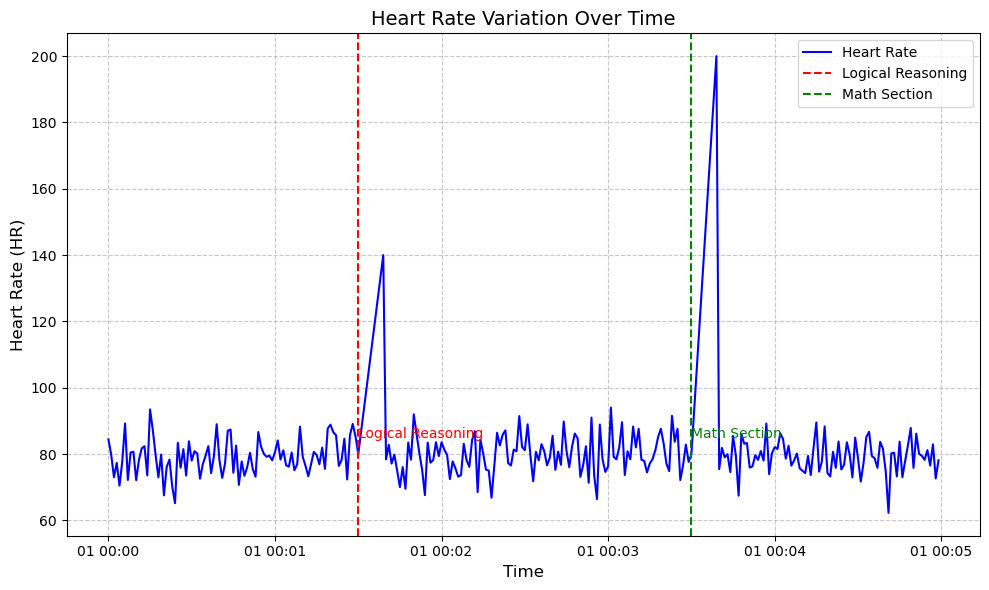

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_hr_data_with_spikes(duration=10, freq=1):
    """
    Generates random heart rate data with two spikes.
    
    Parameters:
        duration (int): Duration in minutes.
        freq (int): Frequency of HR sampling per second.

    Returns:
        DataFrame: A dataframe with Time and HR columns.
    """
    # Total number of points
    total_points = duration * 60 * freq

    # Generate time values
    time = pd.date_range(start="2024-06-01 00:00:00", periods=total_points, freq=f"{int(1000 / freq)}ms")
    
    # Generate baseline heart rate (normal fluctuation)
    hr = np.random.normal(loc=80, scale=5, size=total_points)  # HR fluctuates around 80 bpm
    
    # Add two spikes
    spike_indices = [int(total_points * 0.3), int(total_points * 0.7)]  # Spike at 30% and 70% of duration
    hr[spike_indices[0]:spike_indices[0] + 10] = np.linspace(80, 140, 10)  # Logical Reasoning spike
    hr[spike_indices[1]:spike_indices[1] + 10] = np.linspace(80, 200, 10)  # Math Section spike

    # Combine into DataFrame
    data = pd.DataFrame({"Time": time, "hr": hr})
    return data, spike_indices

# Function to plot HR graph with annotations
def plot_hr_graph(df, spike_indices):
    """
    Plots HR over time with annotated spikes.

    Parameters:
        df (DataFrame): Data containing Time and HR.
        spike_indices (list): Indices where spikes occur.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['hr'], color='blue', label='Heart Rate')

    # Annotate spikes
    plt.axvline(x=df['Time'].iloc[spike_indices[0]], color='red', linestyle='--', label='Logical Reasoning')
    plt.text(df['Time'].iloc[spike_indices[0]], df['hr'].iloc[spike_indices[0]] + 5, 'Logical Reasoning', color='red')

    plt.axvline(x=df['Time'].iloc[spike_indices[1]], color='green', linestyle='--', label='Math Section')
    plt.text(df['Time'].iloc[spike_indices[1]], df['hr'].iloc[spike_indices[1]] + 5, 'Math Section', color='green')

    # Add labels and grid
    plt.title('Heart Rate Variation Over Time', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Heart Rate (HR)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate random HR data with spikes
data, spikes = generate_hr_data_with_spikes(duration=5, freq=1)  # 5 minutes of data at 1 Hz

# Plot the HR data
plot_hr_graph(data, spikes)


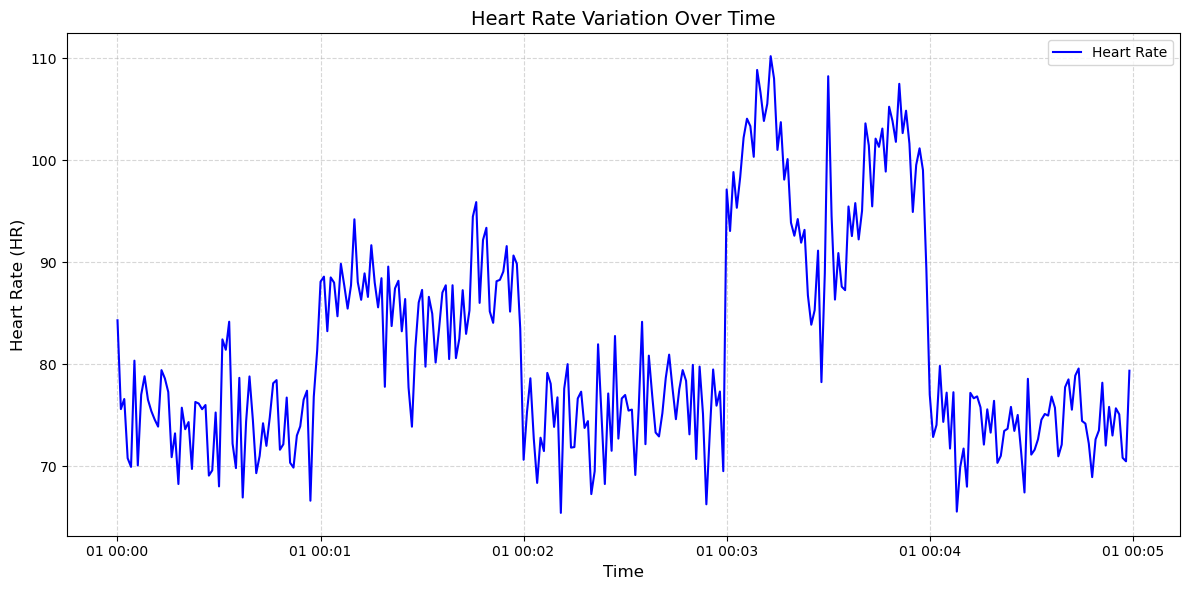

In [3]:

def load_real_hr_data(pre_file, post_control_file, post_treatment_file):
    pre_data = pd.read_csv(pre_file)
    post_control_data = pd.read_csv(post_control_file)
    post_treatment_data = pd.read_csv(post_treatment_file)

    pre_data['timestamp'] = pd.to_datetime(pre_data['timestamp'], unit='ms')
    post_control_data['timestamp'] = pd.to_datetime(post_control_data['timestamp'], unit='ms')
    post_treatment_data['timestamp'] = pd.to_datetime(post_treatment_data['timestamp'], unit='ms')

    pre_data.rename(columns={'hr': 'HR'}, inplace=True)
    post_control_data.rename(columns={'hr': 'HR'}, inplace=True)
    post_treatment_data.rename(columns={'hr': 'HR'}, inplace=True)

    return {
        "Pre": pre_data,
        "Post_Control": post_control_data,
        "Post_Treatment": post_treatment_data,
    }

def plot_real_hr_graph(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['HR'], color='blue', label='Heart Rate')
    
    mid_time = df['timestamp'].iloc[len(df) // 2]
    plt.axvline(x=mid_time, color='red', linestyle='--', label='Midpoint (Logical vs Math)')

    plt.title("Heart Rate Variation Over Time (Real Data)", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Heart Rate (HR)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()



data = load_real_hr_data(pre_file, post_control_file, post_treatment_file)

plot_real_hr_graph(data['Pre'])


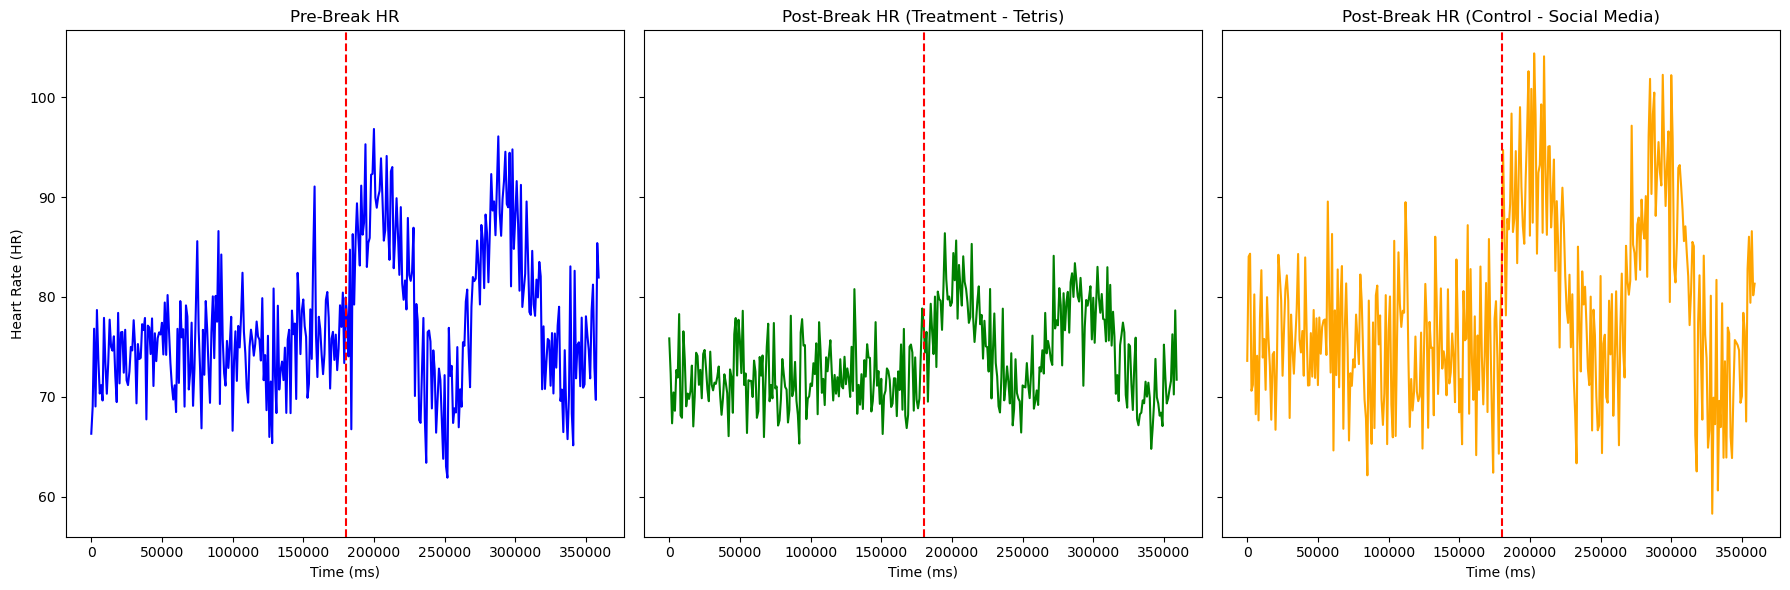

In [9]:
def load_real_hr_data(pre_file, post_control_file, post_treatment_file):
    pre_data = pd.read_csv(pre_file)
    post_control_data = pd.read_csv(post_control_file)
    post_treatment_data = pd.read_csv(post_treatment_file)

    pre_data['timestamp'] = pd.to_datetime(pre_data['timestamp'], unit='ms')
    post_control_data['timestamp'] = pd.to_datetime(post_control_data['timestamp'], unit='ms')
    post_treatment_data['timestamp'] = pd.to_datetime(post_treatment_data['timestamp'], unit='ms')

    pre_data.rename(columns={'hr': 'HR'}, inplace=True)
    post_control_data.rename(columns={'hr': 'HR'}, inplace=True)
    post_treatment_data.rename(columns={'hr': 'HR'}, inplace=True)

    return {
        "Pre": pre_data,
        "Post_Control": post_control_data,
        "Post_Treatment": post_treatment_data,
    }

def plot_hr_comparison(pre_data, post_control_data, post_treatment_data):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    titles = ["Pre-Break HR", "Post-Break HR (Control - Social Media)", "Post-Break HR (Treatment - Tetris)"]

    axes[0].plot(pre_data['timestamp'], pre_data['HR'], color='blue')
    axes[0].axvline(pre_data['timestamp'].iloc[len(pre_data)//2], color='red', linestyle='--')
    axes[0].set_title(titles[0])
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel("Heart Rate (HR)")

    axes[1].plot(post_control_data['timestamp'], post_control_data['HR'], color='orange')
    axes[1].axvline(post_control_data['timestamp'].iloc[len(post_control_data)//2], color='red', linestyle='--')
    axes[1].set_title(titles[1])
    axes[1].set_xlabel("Time")

    axes[2].plot(post_treatment_data['timestamp'], post_treatment_data['HR'], color='green')
    axes[2].axvline(post_treatment_data['timestamp'].iloc[len(post_treatment_data)//2], color='red', linestyle='--')
    axes[2].set_title(titles[2])
    axes[2].set_xlabel("Time")

    plt.tight_layout()
    plt.show()


data = load_real_hr_data(pre_file, post_control_file, post_treatment_file)

plot_hr_comparison(data['Pre'], data['Post_Control'], data['Post_Treatment'])

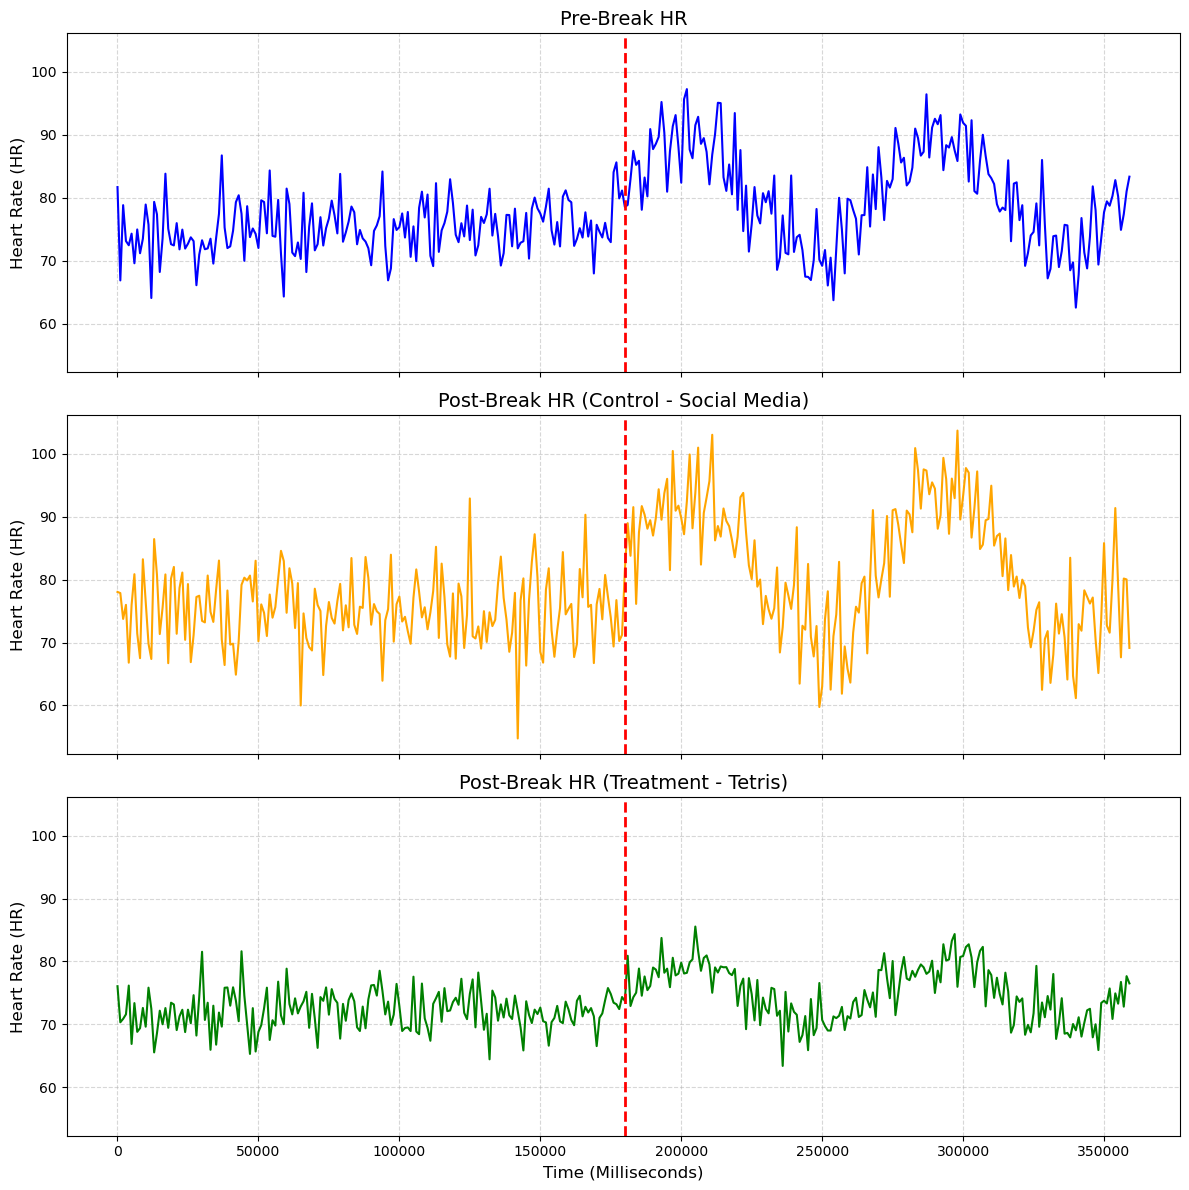

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def load_real_hr_data(pre_file, post_control_file, post_treatment_file):
    pre_data = pd.read_csv(pre_file)
    post_control_data = pd.read_csv(post_control_file)
    post_treatment_data = pd.read_csv(post_treatment_file)

    pre_data['timestamp'] = pd.to_datetime(pre_data['timestamp'], unit='ms')
    post_control_data['timestamp'] = pd.to_datetime(post_control_data['timestamp'], unit='ms')
    post_treatment_data['timestamp'] = pd.to_datetime(post_treatment_data['timestamp'], unit='ms')

    pre_data.rename(columns={'hr': 'HR'}, inplace=True)
    post_control_data.rename(columns={'hr': 'HR'}, inplace=True)
    post_treatment_data.rename(columns={'hr': 'HR'}, inplace=True)

    return {
        "Pre": pre_data,
        "Post_Control": post_control_data,
        "Post_Treatment": post_treatment_data,
    }

def plot_hr_stacked(pre_data, control_data, treatment_data):
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

    axes[0].plot(pre_data['timestamp'], pre_data['HR'], color='blue')
    axes[0].axvline(pre_data['timestamp'].iloc[len(pre_data)//2], color='red', linestyle='--', linewidth=2)
    axes[0].set_title("Pre-Break HR", fontsize=14)
    axes[0].set_ylabel("Heart Rate (HR)", fontsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.5)

    axes[1].plot(control_data['timestamp'], control_data['HR'], color='orange')
    axes[1].axvline(control_data['timestamp'].iloc[len(control_data)//2], color='red', linestyle='--', linewidth=2)
    axes[1].set_title("Post-Break HR (Control - Social Media)", fontsize=14)
    axes[1].set_ylabel("Heart Rate (HR)", fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.5)

    axes[2].plot(treatment_data['timestamp'], treatment_data['HR'], color='green')
    axes[2].axvline(treatment_data['timestamp'].iloc[len(treatment_data)//2], color='red', linestyle='--', linewidth=2)
    axes[2].set_title("Post-Break HR (Treatment - Tetris)", fontsize=14)
    axes[2].set_xlabel("Time (Milliseconds)", fontsize=12)
    axes[2].set_ylabel("Heart Rate (HR)", fontsize=12)
    axes[2].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

data = load_real_hr_data(pre_file, post_control_file, post_treatment_file)

plot_hr_stacked(data['Pre'], data['Post_Control'], data['Post_Treatment'])